In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pickle
import os
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df_train = pd.read_csv('../data/raw/Training.csv')


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo,NaN
4916,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Acne,NaN
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Urinary tract infection,NaN
4918,0,1,0,0,0,0,1,0,0,0,...,0,1,1,1,1,0,0,0,Psoriasis,NaN


In [4]:
df_train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


In [9]:
df_train.isnull().sum().sum()

np.int64(4920)

In [10]:
df_train.duplicated().sum()

np.int64(4616)

In [11]:
df_train = df_train.drop('Unnamed: 133', axis=1)

In [13]:
df_train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [14]:
# Remove any trailing spaces from column names
df_train.columns = df_train.columns.str.strip()

In [16]:
# Analyze the Target Variable ('prognosis') 

prognosis_counts = df_train['prognosis'].value_counts()
print(f"\nNumber of unique diseases: {len(prognosis_counts)}")
print("\nDistribution of diseases:")
print(prognosis_counts)


Number of unique diseases: 41

Distribution of diseases:
prognosis
Fungal infection                           120
Allergy                                    120
GERD                                       120
Chronic cholestasis                        120
Drug Reaction                              120
Peptic ulcer diseae                        120
AIDS                                       120
Diabetes                                   120
Gastroenteritis                            120
Bronchial Asthma                           120
Hypertension                               120
Migraine                                   120
Cervical spondylosis                       120
Paralysis (brain hemorrhage)               120
Jaundice                                   120
Malaria                                    120
Chicken pox                                120
Dengue                                     120
Typhoid                                    120
hepatitis A                            

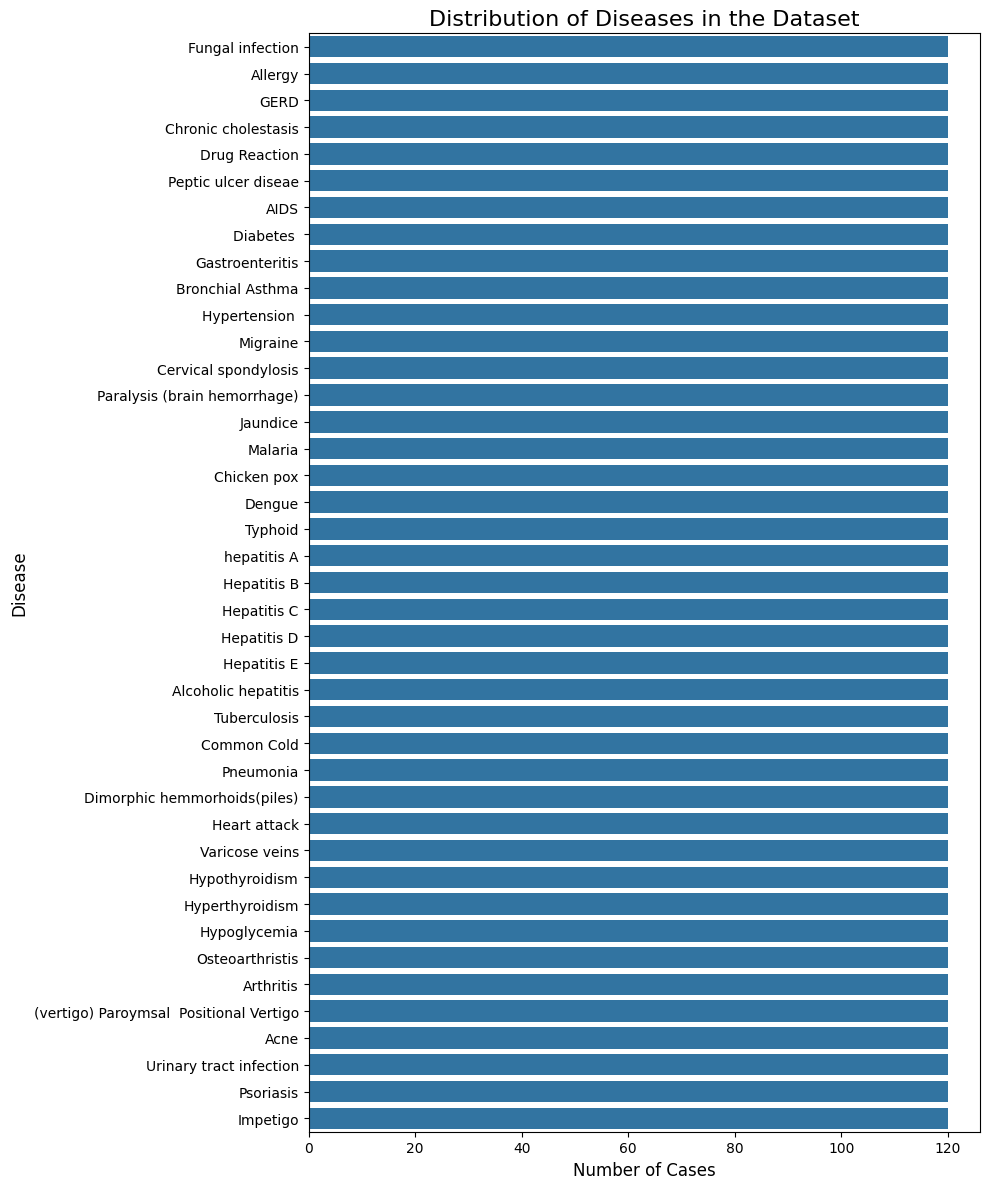

In [17]:
# Visualize the Disease Distribution 
# Create a bar plot to visualize the distribution of diseases
plt.figure(figsize=(10, 12)) # Increase figure size for better readability
sns.countplot(y='prognosis', data=df_train, order=prognosis_counts.index)
plt.title('Distribution of Diseases in the Dataset', fontsize=16)
plt.xlabel('Number of Cases', fontsize=12)
plt.ylabel('Disease', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
# I uncovered the most important characteristic of this dataset: it is perfectly balanced. Each of the 41 diseases has exactly 120 samples.
# No need for complex techniques to handlbalance.


In [18]:
# Separate Features (X) and Target (y) ---
X = df_train.drop('prognosis', axis=1)
y = df_train['prognosis']
print(f"Data separated into features (X) with shape {X.shape} and target (y) with shape {y.shape}.")


Data separated into features (X) with shape (4920, 132) and target (y) with shape (4920,).


In [ ]:
# Encode the Categorical Target Variable 
# Initialize the LabelEncoder
label_encoder = LabelEncoder()
# Fit the encoder to the target variable and transform it into numerical labels
y_encoded = label_encoder.fit_transform(y)
print("Target variable 'prognosis' has been encoded into numerical labels.")


Target variable 'prognosis' has been encoded into numerical labels.


In [23]:
# Split Data into Training and Validation Sets 
# Split the data, using 20% for validation.
# 'stratify=y_encoded' ensures that the proportion of each disease is the same in both the training and validation sets.
X_train, X_val, y_train, y_val = train_test_split(
    X, y_encoded,
    test_size=0.2,
    random_state=42, # Ensures the split is the same every time we run the code
    stratify=y_encoded
)
print(f"Data split into training ({len(X_train)} samples) and validation ({len(X_val)} samples) sets.")


Data split into training (3936 samples) and validation (984 samples) sets.


In [24]:
#  Save Processed Data and the Encoder 
# Define paths for processed data
processed_dir = '../data/processed'
models_dir = '../models'

In [25]:
# Save the split dataframes to CSV files
X_train.to_csv(os.path.join(processed_dir, 'X_train.csv'), index=False)
X_val.to_csv(os.path.join(processed_dir, 'X_val.csv'), index=False)
pd.DataFrame(y_train, columns=['prognosis']).to_csv(os.path.join(processed_dir, 'y_train.csv'), index=False)
pd.DataFrame(y_val, columns=['prognosis']).to_csv(os.path.join(processed_dir, 'y_val.csv'), index=False)
print(f"All processed data files have been saved to the '{processed_dir}' directory.")


All processed data files have been saved to the '../data/processed' directory.


In [26]:
# Save the fitted label encoder using pickle for later use in prediction
encoder_path = os.path.join(models_dir, 'label_encoder.pkl')
with open(encoder_path, 'wb') as file:
    pickle.dump(label_encoder, file)
print(f"Label encoder has been saved to '{encoder_path}'.")

Label encoder has been saved to '../models\label_encoder.pkl'.
